In [165]:
import time
class Profiler:
    def __init__(self):
        self._times:dict = {}
        self.stack:list = []

    @property
    def current(self):
        return self.stack[-1]

    def begin(self, name):
        assert name not in self._times
        print("begin", name)
        self.stack.append(name)
        begin = time.time()
        self._times[name] = [begin, None]

    def end(self):
        assert len(self.stack) > 0
        name = self.stack.pop()
        self._times[name][1] = time.time()
        print("end", name)

    def values(self):
        assert len(self.stack) == 0, "missing end() for '{}'".format(self.current)
        return np.array([end-begin for (begin, end) in self._times.values()])

    def keys(self):
        assert len(self.stack) == 0, "missing end() for '{}'".format(self.current)
        return self._times.keys()

    def __iter__(self):
        assert len(self.stack) == 0, "missing end() for '{}'".format(self.current)
        for key in self._times:
            yield key

    def items(self):
        assert len(self.stack) == 0, "missing end() for '{}'".format(self.current)
        for key, value in self._times:
            yield key, value


begin evaluate
begin read
end read
begin resize
end resize
begin apply lut
end apply lut
end evaluate


<BarContainer object of 4 artists>

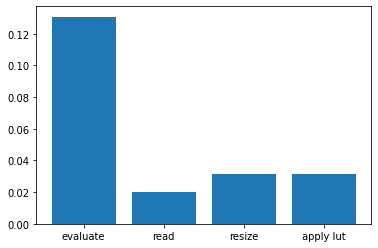

In [167]:
profiler = Profiler()
profiler.begin('evaluate')

profiler.begin('read')
time.sleep(0.01)
profiler.end()

profiler.begin('resize')
time.sleep(0.02)
profiler.end()

profiler.begin('apply lut')
time.sleep(0.03)
profiler.end()

time.sleep(0.04)
profiler.end()

import numpy as np
values = profiler.values()
legends = profiler.keys()

import matplotlib.pyplot as plt
from IPython.core.display import Image, display

plt.bar(legends, values)